In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, num2date
from datetime import datetime
import pandas as pd
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn import datasets, linear_model
from tabulate import tabulate
import os

In [3]:
current_path = os.getcwd()
print(current_path)

d:\Work\04Script\01Oceanography\04ApiMarineCopernicus


In [6]:
data = Dataset(r'CMC_1y_current.nc')
lon = data.variables["longitude"][:].filled(np.nan)
lat = data.variables["latitude"][:].filled(np.nan)
vo = data.variables["vo"][:].filled(np.nan)
uo = data.variables ["uo"][:].filled(np.nan)
#zos = data.variables["zos"][:].filled(np.nan)

time = data.variables["time"][:].filled(np.nan)
time_unit = data.variables["time"].getncattr('units')
local_time = num2date(time, units=time_unit,calendar='gregorian')

In [22]:
cur_speed= np.sqrt(uo**2+vo**2)
cur_dir = np.mod((270-np.rad2deg(np.arctan2(vo, uo))),360)

In [23]:
#Coordinate yang mau di Ekstract
ext_lon = 0.9
ext_lat = 104.3

sq_dif_lon = (lon-ext_lon)**2
sq_dif_lat = (lat-ext_lat)**2
index_lon = sq_dif_lon.argmin()
index_lat = sq_dif_lat.argmin()

#print(index_lon, index_lat)

0 31


In [25]:
time_str = []
for x in local_time:
    time_str.append(str(x))
time_list = pd.to_datetime(pd.Series(time_str), format='%Y-%m-%d %H:%M:%S')

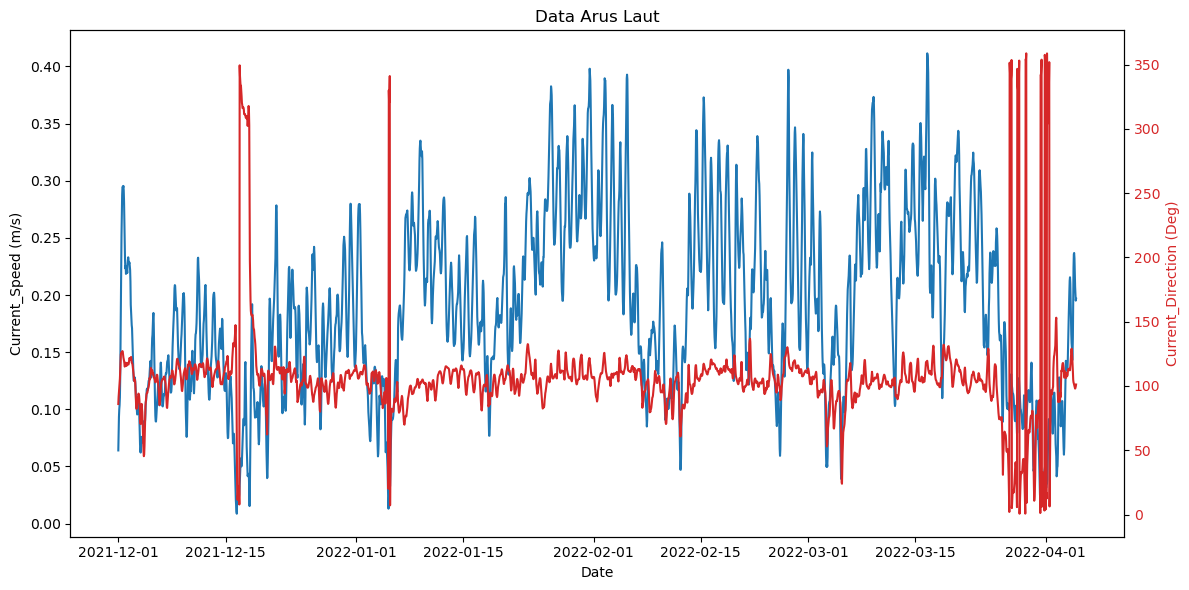

In [65]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Current_Speed (m/s)')
ax1.plot(time_list[0:3000], cur_speed[0:3000,index_lat,index_lon])
ax1.tick_params(axis='y')
ax1.set_title('Data Arus Laut')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Current_Direction (Deg)", color = color)
ax2.plot(time_list[0:3000],cur_dir[0:3000,index_lat,index_lon], color = color)
ax2.tick_params(axis='y', labelcolor = color)

fig.tight_layout()

In [73]:
def get_csv(dataset, **kwargs):
    """
  Get CSV data from a dataset.
  Args:
    dataset: Set Path to Dataset File (.nc)
    **kwargs: Keyword arguments.
    **Keyword argument:**
    * `coor`: A list of two numbers specifying the [Longitude, Latitude] of the point to get the data for. 
    The coordinates should be in decimal degrees.

  
  Returns:
    A NumPy array containing the CSV data.
  """
    data = Dataset(rf'{dataset}')
    lon = data.variables["longitude"][:].filled(np.nan)
    lat = data.variables["latitude"][:].filled(np.nan)
    vo = data.variables["vo"][:].filled(np.nan)
    uo = data.variables ["uo"][:].filled(np.nan)
    #zos = data.variables["zos"][:].filled(np.nan)

    time = data.variables["time"][:].filled(np.nan)
    time_unit = data.variables["time"].getncattr('units')
    local_time = num2date(time, units=time_unit,calendar='gregorian')

    cur_speed= np.sqrt(uo**2+vo**2)
    cur_dir = np.mod((270-np.rad2deg(np.arctan2(vo, uo))),360)
    ext_lon = kwargs["coor"][0]
    ext_lat = kwargs["coor"][1]

    sq_dif_lon = (lon-ext_lon)**2
    sq_dif_lat = (lat-ext_lat)**2
    index_lon = sq_dif_lon.argmin()
    index_lat = sq_dif_lat.argmin()
    print(index_lon, index_lat)

In [74]:
get_csv('CMC_1y_current.nc')

KeyError: 'coor'